In [8]:
import pandas as pd
import numpy as np

#loading the excel file
file_path = '/content/purchase data.csv'  # Updated to CSV file
df = pd.read_csv(file_path)  # Changed to read_csv for CSV files

#gives first five rows of the excel so that it will be known data is loaded properly
print("Loaded Data:\n", df.head())

# selcting the candies,mangoes,milk packets columns for creating matrix A
matrix_A = df.iloc[:, 1:-1].values
#select the last column and convert to column vector
matrix_c= df.iloc[:, -1].values.reshape(-1, 1)
# Dimensionality = no.of features in matrix_A
print("\nDimensionality of vector space:", matrix_A.shape[1])

# Number of vectors = number of rows
print("No.of vectors in vector space:", matrix_A.shape[0])

# Rank of matrix A
rank_A = np.linalg.matrix_rank(matrix_A)
print("Rank of matrix A:", rank_A)

# Computing pseudo-inverse and solve A.X = C
A_pinv = np.linalg.pinv(matrix_A)
X = A_pinv @ matrix_c

# Displaying the results
product_names = ['candies (₹per unit)', 'mangoes (₹ per kg)', 'milk_packets (₹ per unit)']
print("\estimated cost of each product:")
for i in range(len(product_names)):
    print(f"{product_names[i]}: ₹{X[i][0]:.2f}")


Loaded Data:
   Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280

Dimensionality of vector space: 3
No.of vectors in vector space: 10
Rank of matrix A: 3
\estimated cost of each product:
candies (₹per unit): ₹1.00
mangoes (₹ per kg): ₹55.00
milk_packets (₹ per unit): ₹18.00


#A2

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

#loading the csv file
df = pd.read_csv('/content/purchase data.csv')
#creating a label column as Rich(1) if payment >200 else considered as poor(0)
df['Label'] = df['Payment (Rs)'].apply(lambda x: 1 if x > 200 else 0)

# selecing features candies,mangoes,milkpackets
X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = df['Label']

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict class
df['Prediction'] = model.predict(X)
df['Class'] = df['Prediction'].apply(lambda x: 'RICH' if x == 1 else 'POOR')

# Print result
print(df[['Customer', 'Payment (Rs)', 'Class']])


  Customer  Payment (Rs) Class
0      C_1           386  RICH
1      C_2           289  RICH
2      C_3           393  RICH
3      C_4           110  POOR
4      C_5           280  RICH
5      C_6           167  POOR
6      C_7           271  RICH
7      C_8           274  RICH
8      C_9           148  POOR
9     C_10           198  POOR


A3

Population Mean: 1560.66, Variance: 58732.37
Wednesday Mean: 1550.71
April Mean: 1698.95
Probability of Loss: 0.50
Probability of Profit on Wednesday: 0.08
Conditional Probability (Profit | Wednesday): 0.42


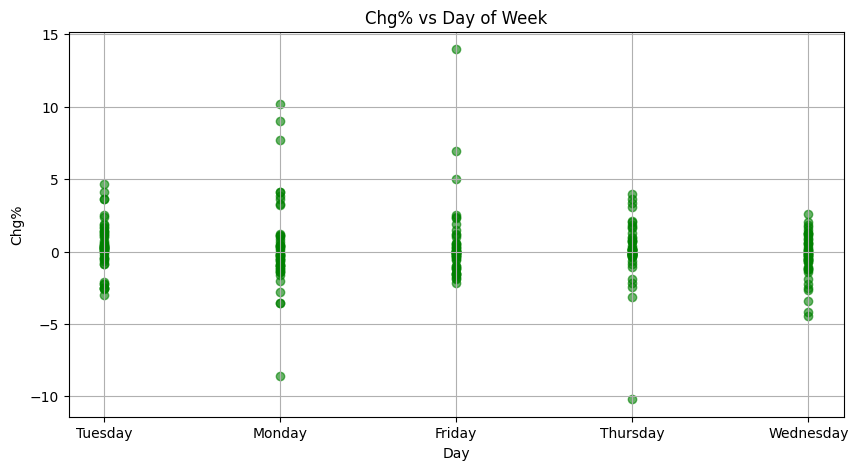

In [10]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/IRCTC stock price.csv')

# Convert 'Date' to datetime and extract weekday
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day_name()

# Clean and convert 'Price' and 'Chg%' columns to numeric
df.iloc[:, 3] = pd.to_numeric(df.iloc[:, 3].astype(str).str.replace(',', '').str.strip(), errors='coerce')
df['Chg%'] = pd.to_numeric(df['Chg%'].astype(str).str.replace('%', '').str.strip(), errors='coerce')

# Drop rows with missing values in key columns
df = df.dropna(subset=[df.columns[3], 'Chg%'])

# Mean and variance of prices
prices = df.iloc[:, 3]
mean_price = statistics.mean(prices)
var_price = statistics.variance(prices)
print(f"Population Mean: {mean_price:.2f}, Variance: {var_price:.2f}")

# Mean price on Wednesdays
wednesday_prices = df[df['Day'] == 'Wednesday'].iloc[:, 3]
mean_wed = statistics.mean(wednesday_prices)
print(f"Wednesday Mean: {mean_wed:.2f}")

# Mean price in April
april_prices = df[df['Date'].dt.month == 4].iloc[:, 3]
mean_apr = statistics.mean(april_prices)
print(f"April Mean: {mean_apr:.2f}")

# Probability of loss
loss_prob = (df['Chg%'] < 0).mean()
print(f"Probability of Loss: {loss_prob:.2f}")

# Probability of profit on Wednesday
profit_wed_prob = ((df['Chg%'] > 0) & (df['Day'] == 'Wednesday')).mean()
print(f"Probability of Profit on Wednesday: {profit_wed_prob:.2f}")

# Conditional probability: Profit given it's Wednesday
P_Profit_given_Wed = ((df['Chg%'] > 0) & (df['Day'] == 'Wednesday')).sum() / (df['Day'] == 'Wednesday').sum()
print(f"Conditional Probability (Profit | Wednesday): {P_Profit_given_Wed:.2f}")

# Scatter plot: Change % vs Day of Week
plt.figure(figsize=(10, 5))
plt.scatter(df['Day'], df['Chg%'], color='green', alpha=0.6)
plt.title("Chg% vs Day of Week")
plt.xlabel("Day")
plt.ylabel("Chg%")
plt.grid(True)
plt.show()


A4,A5,A6,A7,A8,A9

A4: Data Types:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measure

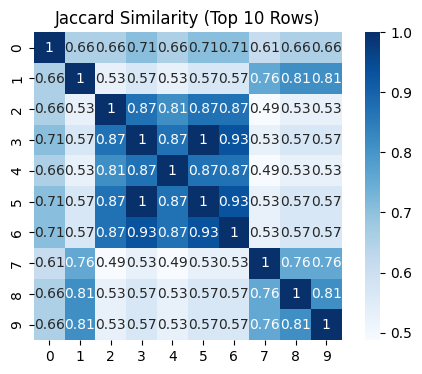

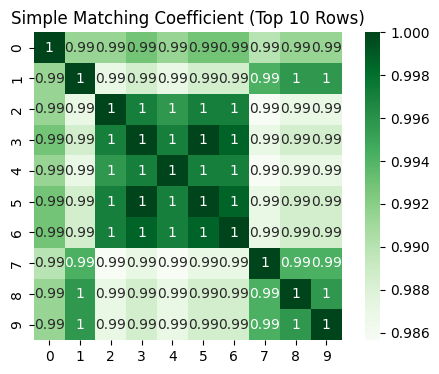

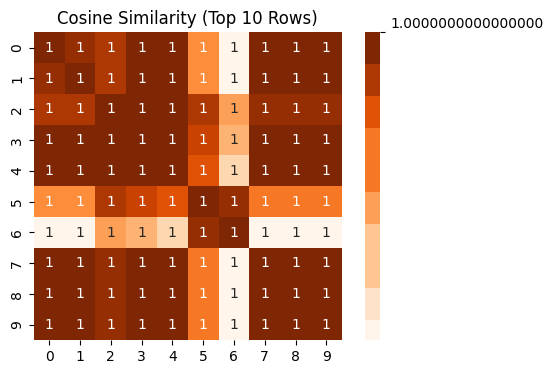

/tmp/ipython-input-11-1526254610.py:101: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean[col] = pd.to_numeric(df_clean[col], errors='ignore')


✅ A8: Imputed DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Record ID                  9172 non-null   int64  
 1   age                        9172 non-null   int64  
 2   sex                        9172 non-null   object 
 3   on thyroxine               9172 non-null   object 
 4   query on thyroxine         9172 non-null   object 
 5   on antithyroid medication  9172 non-null   object 
 6   sick                       9172 non-null   object 
 7   pregnant                   9172 non-null   object 
 8   thyroid surgery            9172 non-null   object 
 9   I131 treatment             9172 non-null   object 
 10  query hypothyroid          9172 non-null   object 
 11  query hyperthyroid         9172 non-null   object 
 12  lithium                    9172 non-null   object 
 13  goitre             

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import cosine_similarity

# A4: Dataset Exploration
def explore_data(df):
    data_types = df.dtypes
    missing = df.isnull().sum()
    stats = df.describe()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Label Encoding
    label_encoded_df = df.copy()
    encoder = LabelEncoder()
    for col in cat_cols:
        label_encoded_df[col] = encoder.fit_transform(label_encoded_df[col].astype(str))

    # One-Hot Encoding
    onehot_df = pd.get_dummies(df, columns=cat_cols)

    # Numeric columns mean & std
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    mean_std = {col: (df[col].mean(), df[col].std()) for col in num_cols}

    return {
        "data_types": data_types,
        "missing_values": missing,
        "statistics": stats,
        "categorical_columns": cat_cols,
        "label_encoded": label_encoded_df,
        "onehot_encoded": onehot_df,
        "numeric_columns": num_cols,
        "mean_std": mean_std
    }

# A5: Binary Similarity (Jaccard & SMC)
def binary_similarity(df, idx1, idx2):
    v1 = df.iloc[idx1].astype(int)
    v2 = df.iloc[idx2].astype(int)

    f11 = ((v1 == 1) & (v2 == 1)).sum()
    f00 = ((v1 == 0) & (v2 == 0)).sum()
    f10 = ((v1 == 1) & (v2 == 0)).sum()
    f01 = ((v1 == 0) & (v2 == 1)).sum()

    jaccard = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) > 0 else 0
    smc = (f11 + f00) / (f11 + f00 + f10 + f01)

    return {
        "f11": f11, "f00": f00, "f10": f10, "f01": f01,
        "jaccard": jaccard, "smc": smc
    }

# A6: Cosine Similarity
def cosine_sim(df, idx1, idx2):
    vec1 = df.iloc[idx1].values.reshape(1, -1)
    vec2 = df.iloc[idx2].values.reshape(1, -1)
    return cosine_similarity(vec1, vec2)[0][0]

# A7: Heatmap Plots
def plot_similarity_matrices(df, n=10):
    jc_mat = np.zeros((n, n))
    smc_mat = np.zeros((n, n))
    cos_mat = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == j:
                jc_mat[i][j] = smc_mat[i][j] = cos_mat[i][j] = 1.0
            else:
                binary = binary_similarity(df, i, j)
                jc_mat[i][j] = binary["jaccard"]
                smc_mat[i][j] = binary["smc"]
                cos_mat[i][j] = cosine_sim(df, i, j)

    plt.figure(figsize=(6, 4))
    sns.heatmap(jc_mat, annot=True, cmap="Blues", square=True)
    plt.title("Jaccard Similarity (Top 10 Rows)")
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.heatmap(smc_mat, annot=True, cmap="Greens", square=True)
    plt.title("Simple Matching Coefficient (Top 10 Rows)")
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.heatmap(cos_mat, annot=True, cmap="Oranges", square=True)
    plt.title("Cosine Similarity (Top 10 Rows)")
    plt.show()

# A8: Impute missing values
def impute_missing_values(data):
    df_clean = data.replace('?', np.nan).copy()

    # Convert columns to numeric where possible
    for col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='ignore')

    # Impute numeric columns
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_clean[col].isnull().sum() > 0:
            skewness = df_clean[col].dropna().skew()
            strategy = 'mean' if abs(skewness) < 1 else 'median'
            imputer = SimpleImputer(strategy=strategy)
            df_clean[[col]] = imputer.fit_transform(df_clean[[col]])

    # Impute categorical columns
    cat_cols = df_clean.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if df_clean[col].isnull().sum() > 0:
            imputer = SimpleImputer(strategy='most_frequent')
            df_clean[[col]] = imputer.fit_transform(df_clean[[col]])

    return df_clean

# A9: Normalize data
def normalize_data(data, method='minmax'):
    df_norm = data.copy()
    numeric_cols = df_norm.select_dtypes(include=[np.number]).columns

    scaler = MinMaxScaler() if method == 'minmax' else StandardScaler()
    df_norm[numeric_cols] = scaler.fit_transform(df_norm[numeric_cols])

    return df_norm




# === MAIN EXECUTION ===
df = pd.read_csv("/content/thyroid0387_UCl.csv")
explore = explore_data(df)

# A4 Output
print("A4: Data Types:\n", explore["data_types"])
print("\nMissing Values:\n", explore["missing_values"])
print("\nDescriptive Stats:\n", explore["statistics"])
print("\nCategorical Columns:", explore["categorical_columns"])
print("\nMean & Std Dev of Numeric Columns:")
for col, (mean, std) in explore["mean_std"].items():
    print(f"{col}: Mean = {mean:.2f}, Std = {std:.2f}")

# A5: Binary Similarity (Rows 0 & 1)
sim = binary_similarity(explore["onehot_encoded"], 0, 1)
print("\nA5: Binary Similarity (Row 0 vs 1):")
print(sim)

# A6: Cosine Similarity (Rows 0 & 1)
cos_sim = cosine_sim(explore["onehot_encoded"], 0, 1)
print(f"\nA6: Cosine Similarity (Row 0 vs 1): {cos_sim:.4f}")

# A7: Plot Similarity Matrices
print("\nA7: Similarity Heatmaps (Top 10 Rows):")
plot_similarity_matrices(explore["onehot_encoded"], n=10)
#A8
df_imputed = impute_missing_values(df)

print("✅ A8: Imputed DataFrame Info")
print(df_imputed.info())
print("\n A few rows after imputation:")
print(df_imputed.head())

# A9: normalization
df_minmax = normalize_data(df_imputed, method='minmax')
df_zscore = normalize_data(df_imputed, method='zscore')

print("\n✅ A9: MinMax Normalized DataFrame (first 5 rows):")
print(df_minmax.head())

print("\n✅ A9: Z-score Normalized DataFrame (first 5 rows):")
print(df_zscore.head())
